# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [578]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)
num_test = len(newsgroups_test.target)

test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [892]:
def P1(num_examples=5):
    ### STUDENT START ###
    for i in range(num_examples):
        print("\n",newsgroups_train.target_names[train_labels[i]], " \n\n ", train_data[i])


    
    

    
    
### STUDENT END ###
P1()


 comp.graphics  

  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

 talk.religion.misc  

  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 sci.space  


(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [899]:
def P2():
    
### STUDENT START ###

    count_vec = CountVectorizer(min_df = 1)
    X_vec = count_vec.fit_transform(train_data)
    num_docs = len(train_data)
    voca_size = X_vec.shape[1]
    print("a.")
    print("Size of vocabulary: ",voca_size)
    print("average of non zero features per example ", X_vec.nnz/num_docs)
    print("Fraction of non zero entries ", X_vec.nnz/(num_docs*voca_size))
    print("b.")
    print("First feature name", count_vec.get_feature_names()[0])
    print("Last feature name", count_vec.get_feature_names()[voca_size-1])
    print("c.")
    count_vec_4 = CountVectorizer(min_df = 1,vocabulary=["atheism", "graphics", "space", "religion"])
    X_vec_4 = count_vec_4.fit_transform(train_data)
    print("With dictionary of 4 words, now the shape of the vector is: ",X_vec_4.shape)
    print("And average of non zero features per example now is", X_vec_4.nnz/num_docs)
    
    print("d.")
    ## use bi gram and tri gram with analyzer of type character
    count_vec_bi_tri = CountVectorizer(min_df = 1,analyzer='char', ngram_range =(2,3))
    X_vec_bi_tri = count_vec_bi_tri.fit_transform(train_data)
    print("Now with bi gram and tri gram, using character instead of words, the size of vocabulary is: ",X_vec_bi_tri.shape[1])
    

    ##in case of using 10 as the limit for min_df
    print("e.")
    
    count_vec_10 = CountVectorizer(min_df = 10)
    X_vec_10 = count_vec.fit_transform(train_data)
    voca_size_10 = X_vec_10.shape[1]
    print("Size of vocabulary when putting limit of 10 as minimum requirement  ",voca_size_10)

    ##compare vocabulary size between dev and train size
    print("f.")

    count_vec_dev = CountVectorizer(min_df = 1)
    X_vec_dev = count_vec_dev.fit_transform(dev_data)
    voca_size_dev = X_vec_dev.shape[1]
    print("Difference between train and dev in terms of vocabulary size is ",voca_size - voca_size_dev)
    
    
### STUDENT END ###

P2()

a.
Size of vocabulary:  26879
average of non zero features per example  96.70599803343165
Fraction of non zero entries  0.0035978272269590263
b.
First feature name 00
Last feature name zyxel
c.
With dictionary of 4 words, now the shape of the vector is:  (2034, 4)
And average of non zero features per example now is 0.26843657817109146
d.
Now with bi gram and tri gram, using character instead of words, the size of vocabulary is:  35478
e.
Size of vocabulary when putting limit of 10 as minimum requirement   26879
f.
Difference between train and dev in terms of vocabulary size is  10633


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [910]:
def P3():
   
 

### STUDENT START ###

    k_range = [1,2,3,4,5,6,7,8,9,10]
    param_grid_knn = [{'knn__n_neighbors':k_range}]

    pipe_knn = Pipeline([('count_vec', CountVectorizer()),  ('knn', KNeighborsClassifier())])
    gs_knn = GridSearchCV(estimator = pipe_knn, param_grid = param_grid_knn, scoring = 'f1_weighted', cv =10, n_jobs=-1)
    gs_knn.fit(train_data, train_labels)
    print("F1 weighted score on dev data of the best knn model:",metrics.f1_score(dev_labels, gs_knn.best_estimator_.predict(dev_data), average ='weighted'))
    print("Best knn f1 weighted score on CV data: ", gs_knn.best_score_)
    print("Best knn param", gs_knn.best_params_)
    
    alphas = [0.1,0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1,1.01, 1.2, 1.5, 2]
    param_grid_mnb = [{'mnb__alpha':alphas}]

    pipe_mnb = Pipeline([('count_vec', CountVectorizer()),  ('mnb', MultinomialNB())])
    gs_mnb = GridSearchCV(estimator = pipe_mnb, param_grid = param_grid_mnb, scoring = 'f1_weighted', cv =10, n_jobs=-1)
    gs_mnb.fit(train_data, train_labels)
    print("F1 weighted score on dev data of the best mnb model:",metrics.f1_score(dev_labels, gs_mnb.best_estimator_.predict(dev_data), average ='weighted'))

    print("Best mnb f1 on CV data", gs_mnb.best_score_)
    print("Best mnb param", gs_mnb.best_params_)
    
    
    
    C = [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1, 5, 10, 30, 50]
    param_grid_lr = [{'lr__C':C}]

    pipe_lr = Pipeline([('count_vec', CountVectorizer()),  ('lr', LogisticRegression(penalty ='l2'))])
    gs_lr = GridSearchCV(estimator = pipe_lr, param_grid = param_grid_lr, scoring = 'f1_weighted', cv =10, n_jobs=-1)
    gs_lr.fit(train_data, train_labels)
    print("F1 weighted score on dev data of the best lr model:",metrics.f1_score(dev_labels, gs_lr.best_estimator_.predict(dev_data), average ='weighted'))

    print("Best lr f1 on CV data", gs_lr.best_score_)
    print("Best lr param", gs_lr.best_params_)
    
    for c in C:
        print('for C =',c)
        pipe_lr = Pipeline([('count_vec', CountVectorizer()),  ('lr', LogisticRegression(penalty ='l2', C=c))])
        pipe_lr.fit(train_data, train_labels)
        lr_estimator = pipe_lr.named_steps['lr']
        for i in range(np.array(lr_estimator.coef_).shape[0]):
            print("class", i+1,"sum of square",np.sum(np.square(lr_estimator.coef_[i])))



### STUDENT END ###

P3()


F1 weighted score on dev data of the best knn model: 0.446983581171
Best knn f1 weighted score on CV data:  0.44084774159751094
Best knn param {'knn__n_neighbors': 8}
F1 weighted score on dev data of the best mnb model: 0.79030523851
Best mnb f1 on CV data 0.8362756079176719
Best mnb param {'mnb__alpha': 0.1}
F1 weighted score on dev data of the best lr model: 0.708473977649
Best lr f1 on CV data 0.781680469327559
Best lr param {'lr__C': 0.5}
for C = 0.01
class 1 sum of square 2.54148768255
class 2 sum of square 2.93970936836
class 3 sum of square 2.86246910169
class 4 sum of square 2.25002918952
for C = 0.1
class 1 sum of square 27.1362351115
class 2 sum of square 24.6595673235
class 3 sum of square 27.4587234794
class 4 sum of square 23.0260045509
for C = 0.2
class 1 sum of square 49.7476260916
class 2 sum of square 42.7454014641
class 3 sum of square 49.3306196034
class 4 sum of square 42.6683139958
for C = 0.3
class 1 sum of square 69.2718702958
class 2 sum of square 57.8897893396


ANSWER:


a. Why doesn't nearest neighbors work well for this problem?
Answer: 
There're two reasons:
1. Documents of even different topics in a copus can share many generic words while there're just a few words really distinguish a topic from another. The current bag of word approach treats generic words and words that represent topics the same. The k nearest neighbors does not have a mechanism to have different weights for different features (words) so it suffers more from this problem compared to logistic regression.
2. The k nearestneighbors rely on sum of squares of distance of all features between 2 documents. This sum is not sensitive to a few features specific to individual topics compared to Naive Bayes which use the product of all posterior probability of features given class. 


b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
Answer:
Again, due to the nature of the problem that only a few key words play important roles in differentiating a topic while there're too many common words. This makes the Naive Bayes shine because the posterior probability of those features have big impoact  in the product of all features which is probability of the resulted posterior class probability while in sum of squares in logistic regression , it's more difficult for these feature to make an impact with so many noise features.
This is why when using regularization to suppress irrelavant feature logistic regression improves a lot.

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

Because c is inverse of regularization strength so the larger the C value, the more relaxed the regularization and therefore COEF values generally increase as C increases as illustrated from the output of the function

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [924]:
def P4():
    stop_words = ['you', 'it', 'he', "hi","a","ve","an", "is", "are", "was","were","my","his","her", "and","but", "the", "in","of", "do", "don", "does", "that", "to" ,"for"]
    def lower_preprocessor(s):
        if 'jesus' in s:
            s = s + " jesus"*111150
        
        return s.lower()
    def better_preprocessor(s):
        pattern_1 = re.compile(r'[^a-zA-Z0-9\s+]')
        pattern_2 = re.compile(r'\b\d+\b')
        s1= pattern_1.sub(" ", s)
        s2 =pattern_2.sub(" ", s1)
        return s2
    count_vec = CountVectorizer(min_df = 1)
    X_vec = count_vec.fit_transform(train_data)
    num_docs = len(train_data)
    voca_size = X_vec.shape[1]
    new_train = list(map(lower_preprocessor,(map(better_preprocessor, train_data))))

### STUDENT START ###
### 1. Get the best model
    def P4_1():
        C = [0.5]
        param_grid_lr = [{'lr__C':C}]

        pipe_lr = Pipeline([('count_vec', CountVectorizer(stop_words =stop_words)),  ('lr', LogisticRegression(penalty ='l2'))])
        gs_lr = GridSearchCV(estimator = pipe_lr, param_grid = param_grid_lr, scoring = 'f1_weighted', cv =10, n_jobs=-1)
        gs_lr.fit(new_train, train_labels)
        best_lr_mat = np.array(gs_lr.best_estimator_.named_steps['lr'].coef_)
        best_lr_fnames = np.array(gs_lr.best_estimator_.named_steps['count_vec'].get_feature_names())

        five_largest_mat = best_lr_mat.argsort(axis =1)[:,::-1][:,:5]
        five_largest_row= five_largest_mat.flatten()
        names = best_lr_fnames[five_largest_row].transpose()

        mat_t = best_lr_mat.transpose()[five_largest_row,:]
        np.set_printoptions(precision=1)
        print("            ", newsgroups_train.target_names)
        for i in range(20):
            print('{:10} {:14.1f}{:14.1f}{:14.1f}{:14.1f}'.format(names[i], mat_t[i,0], mat_t[i,1], mat_t[i,2], mat_t[i,3]))

        
    def P4_2():

### 1. Get the best model
        C = [0.5]
        param_grid_lr = [{'lr__C':C}]

        pipe_lr = Pipeline([('count_vec', CountVectorizer(ngram_range=(2, 2), stop_words =stop_words)),  ('lr', LogisticRegression(penalty ='l2'))])
        gs_lr = GridSearchCV(estimator = pipe_lr, param_grid = param_grid_lr, scoring = 'f1_weighted', cv =10, n_jobs=-1)
        gs_lr.fit(new_train, train_labels)
        best_lr_mat = np.array(gs_lr.best_estimator_.named_steps['lr'].coef_)
        best_lr_fnames = np.array(gs_lr.best_estimator_.named_steps['count_vec'].get_feature_names())

        five_largest_mat = best_lr_mat.argsort(axis =1)[:,::-1][:,:5]
        five_largest_row= five_largest_mat.flatten()
        names = best_lr_fnames[five_largest_row].transpose()

        mat_t = best_lr_mat.transpose()[five_largest_row,:]
        np.set_printoptions(precision=1)
        print("                     ", newsgroups_train.target_names)
        for i in range(20):
            print('{:16} {:16.1f}{:16.1f}{:16.1f}{:16.1f}'.format(names[i], mat_t[i,0], mat_t[i,1], mat_t[i,2], mat_t[i,3]))
### STUDENT END ###
    P4_1()
    P4_2()
### STUDENT END ###

P4()

             ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
bobby                 0.8          -0.3          -0.3          -0.0
atheists              0.8          -0.0          -0.3          -0.0
atheism               0.8          -0.2          -0.4          -0.0
religion              0.8          -0.5          -0.7           0.0
deletion              0.7          -0.2          -0.3          -0.0
graphics             -0.7           1.4          -1.1          -0.1
file                 -0.3           0.9          -0.7          -0.0
3d                   -0.3           0.9          -0.6          -0.0
looking              -0.5           0.8          -0.4          -0.0
computer              0.1           0.7          -0.5          -0.0
space                -1.1          -0.8           1.9          -0.1
orbit                -0.3          -0.5           1.0          -0.0
nasa                 -0.5          -0.2           0.8          -0.0
launch               -0.3          

I used stop_words to eliminate some common words that does not have any differentiating power to the topic. When using n_gram of 2, the alt.atheism and talk.religion.misc share a common gram "Cheers Kent". This seems to be a common author in both news groups.Another observation is the alt.atheism contains several 2-grams that do not sound special or relavant to the topic that I hope for "talking about" "look up"...So it seems that this topic contains all kinds of  content and is more generic than the name suggests.

ANSWER:

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [974]:
### STUDENT START ###

def better_preprocessor(s):
    #replace all non alphanumeric
    pattern_1 = re.compile(r'[^a-zA-Z0-9\s+]')
    #replace all items with number in the leading position

    pattern_2 = re.compile(r'\b\d+\w*\d*\b')
    #replace words longer than 11 

    pattern_3 = re.compile(r'\b\w{11,}\b')
    #replace words less than 2 

    pattern_4 = re.compile(r'\b\w{0,2}\b')

    s1= pattern_1.sub(" ", s)
    s2 =pattern_2.sub(" ", s1)
    s3 =pattern_3.sub("", s2)
    s4=pattern_4.sub("", s3)

    return s4.lower()



def P5():


    count_vec = CountVectorizer()
    X_vec = count_vec.fit_transform(train_data)
    num_docs = len(train_data)
    voca_size = X_vec.shape[1]

     
    alphas = [0.1,0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1,1.01, 1.2, 1.5, 2]
    param_grid_mnb = [{'mnb__alpha':alphas}]
    #with  preprocessing

    pipe_mnb = Pipeline([('count_vec', CountVectorizer(preprocessor = better_preprocessor)),  ('mnb', MultinomialNB())])
    gs_mnb = GridSearchCV(estimator = pipe_mnb, param_grid = param_grid_mnb, scoring = 'f1_weighted', cv =10, n_jobs=-1)
    gs_mnb.fit(train_data, train_labels)
    voca_train_new = gs_mnb.best_estimator_.named_steps['count_vec'].vocabulary_

    print("new vocabulary size is", len(voca_train_new), "old size is ", voca_size)

    print("best mnb param", gs_mnb.best_params_)
    
    #without  preprocessing
    
    
    pipe_mnb_ori = Pipeline([('count_vec', CountVectorizer()),  ('mnb', MultinomialNB())])
    gs_mnb_ori = GridSearchCV(estimator = pipe_mnb_ori, param_grid = param_grid_mnb, scoring = 'f1_weighted', cv =10, n_jobs=-1)
    gs_mnb_ori.fit(train_data, train_labels)
    

    print("F1 weighted score on unprocessed dev data",metrics.f1_score(dev_labels, gs_mnb_ori.best_estimator_.predict(dev_data), average ='weighted'))
    print("F1 weighted score on processed dev data",metrics.f1_score(dev_labels, gs_mnb.best_estimator_.predict(dev_data), average ='weighted'))

    
    


    ### STUDENT END ###
    
P5()

new vocabulary size is 21064 old size is  26879
best mnb f1 0.8335929166628485
best mnb param {'mnb__alpha': 0.1}
F1 weighted score on unprocessed dev data 0.79030523851
F1 weighted score on processed dev data 0.797281117654


The improvement from applying preprosssing is about 0.72% on the dev dataset

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

for C = 0.2
Number of non zero weights with L1:  370
Number of non zero weights with L2:  26879
vocab size  370
for C = 0.5
Number of non zero weights with L1:  733
Number of non zero weights with L2:  26879
vocab size  733
for C = 0.8
Number of non zero weights with L1:  948
Number of non zero weights with L2:  26879
vocab size  948
for C = 1
Number of non zero weights with L1:  1077
Number of non zero weights with L2:  26879
vocab size  1077
for C = 3
Number of non zero weights with L1:  1761
Number of non zero weights with L2:  26879
vocab size  1761
for C = 5
Number of non zero weights with L1:  1965
Number of non zero weights with L2:  26879
vocab size  1965
for C = 7
Number of non zero weights with L1:  2564
Number of non zero weights with L2:  26879
vocab size  2564
for C = 9
Number of non zero weights with L1:  2487
Number of non zero weights with L2:  26879
vocab size  2487
for C = 11
Number of non zero weights with L1:  3180
Number of non zero weights with L2:  26879
vocab si

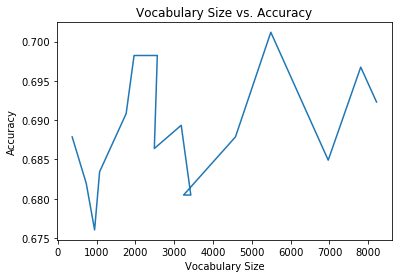

In [985]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
     
    C = [0.2, 0.5, 0.8, 1, 3, 5, 7, 9, 11,15, 20, 30, 50, 80, 100, 120]
    param_grid_lr = [{'lr__C':C}]
    max_iter =200
    tol = 0.01

    accuracies =[]
    vocab_size = []
    for c in C:
        print('for C =',c)
        pipe_lr = Pipeline([('count_vec', CountVectorizer()),  ('lr', LogisticRegression(penalty ='l1', C=c, max_iter=max_iter, tol=tol))])
        pipe_lr.fit(train_data, train_labels)
        lr_coef = np.array(pipe_lr.named_steps['lr'].coef_)
        count_vec = pipe_lr.named_steps['count_vec']
        #Non zero weights for topic 1
        a1 = np.argwhere(lr_coef[0]).reshape(-1,)
        #Non zero weights for topic 2
        a2 = np.argwhere(lr_coef[1]).reshape(-1,)
        #Non zero weights for topic 3

        a3 = np.argwhere(lr_coef[2]).reshape(-1,)
        #Non zero weights for topc 4
        a4 = np.argwhere(lr_coef[3]).reshape(-1,)
        #Combine and remove duplicate feature names
        nonzeros_indices = np.unique(np.concatenate((a1, a2, a3, a4)))
        print("Number of non zero weights with L1: ", nonzeros_indices.size )

        pipe_lr_l2 = Pipeline([('count_vec', CountVectorizer()),  ('lr', LogisticRegression(penalty ='l2', C=c, max_iter=max_iter, tol=tol))])
        pipe_lr_l2.fit(train_data, train_labels)
        lr_coef_l2 = np.array(pipe_lr_l2.named_steps['lr'].coef_)
        count_vec_l2 = pipe_lr_l2.named_steps['count_vec']
        #Non zero weights for topic 1
        a1_l2 = np.argwhere(lr_coef_l2[0]).reshape(-1,)
        #Non zero weights for topic 2
        a2_l2 = np.argwhere(lr_coef_l2[1]).reshape(-1,)
        #Non zero weights for topic 3

        a3_l2 = np.argwhere(lr_coef_l2[2]).reshape(-1,)
        #Non zero weights for topc 4
        a4_l2 = np.argwhere(lr_coef_l2[3]).reshape(-1,)
        #Combine and remove duplicate feature names
        nonzeros_indices_l2 = np.unique(np.concatenate((a1_l2, a2_l2, a3_l2, a4_l2)))
        print("Number of non zero weights with L2: ", nonzeros_indices_l2.size )

        
        
        #build a vocabulary of non zero weight items
        vocab = np.array(count_vec.get_feature_names())[nonzeros_indices]
        vocab_size.append(len(vocab))
        
        #Train a new model with only non zero weight items

        pipe_lr2 = Pipeline([('count_vec', CountVectorizer(vocabulary=vocab)),  ('lr', LogisticRegression(penalty ='l2', C=c, max_iter=max_iter, tol=tol))])
        pipe_lr2.fit(train_data, train_labels)
        new_dev_data = pipe_lr2.named_steps['count_vec'].transform(dev_data)
        accuracies.append(pipe_lr2.named_steps['lr'].score(new_dev_data, dev_labels))
    plt.plot(vocab_size, accuracies)
    plt.xlabel("Vocabulary Size")
    plt.ylabel("Accuracy")
    plt.title("Vocabulary Size vs. Accuracy")
    ### STUDENT END ###
    
P6()

Additional comment: The non zero weights in L2 is always the total number of items in original vocabulary no mater what c value is set. This is because L2 cannot squeeze the weights down to zero. That's why we need to rely on L1 to select the features.


(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [979]:
def preprocessor_1(s):
    #replace all non alphanumeric
    pattern_1 = re.compile(r'[^a-zA-Z0-9\s+]')
    #replace all items with number in the leading position

    pattern_2 = re.compile(r'\b\d+\w*\d*\b')
    #replace words longer than 11 

    pattern_3 = re.compile(r'\b\w{11,}\b')
    #replace words less than 2 

    pattern_4 = re.compile(r'\b\w{0,2}\b')

    s1= pattern_1.sub(" ", s)
    s2 =pattern_2.sub(" ", s1)
    s3 =pattern_3.sub("", s2)
    s4=pattern_4.sub("", s3)
    return s4.lower()



def P7():
    stop_words =["and", "the", "in","of", "do", "that", "to" ]

    pipe_lr3 = Pipeline([('tfidf_vec', TfidfVectorizer(stop_words =stop_words, preprocessor=preprocessor_1)),  ('lr', LogisticRegression(penalty ='l2', C=200,multi_class ='multinomial', solver ='sag', max_iter=400))])
    pipe_lr3.fit(train_data, train_labels)

    lr3_vec = pipe_lr3.named_steps['tfidf_vec']
    print("accuracy", pipe_lr3.score(dev_data, dev_labels))
    probabilities = pipe_lr3.predict_proba(dev_data)
    print("prob shape", probabilities.shape)
    predicted_classes = pipe_lr3.predict(dev_data)
    print("predicted class shape", predicted_classes.shape)
    print("class orders:", pipe_lr3.classes_)
    print(confusion_matrix(dev_labels, predicted_classes))

    r_array=[]
    for i in range(probabilities.shape[0]):
        max_prob = probabilities[i][predicted_classes[i]]
        actual_prob = probabilities[i][dev_labels[i]]
        r_array.append(max_prob/actual_prob)
        
    top_3_r_indices = np.argsort(r_array)[::-1][:3]
    for k in top_3_r_indices:
        print(k)
        print(probabilities[k])

        print("predicted class, ", newsgroups_train.target_names[predicted_classes[k]], " with probability: ",probabilities[k][predicted_classes[k]], "actual class is: ", newsgroups_train.target_names[dev_labels[k]],"with probability:", probabilities[k][dev_labels[k]])
        print(dev_data[k])
## STUDENT END ###

P7()

accuracy 0.761834319527
prob shape (676, 4)
predicted class shape (676,)
class orders: [0 1 2 3]
[[ 99   4  24  38]
 [  5 166  13   1]
 [ 11  13 169   6]
 [ 24   8  14  81]]
665
[  2.7e-04   1.0e+00   2.0e-03   2.0e-04]
predicted class,  comp.graphics  with probability:  0.99756654536 actual class is:  talk.religion.misc with probability: 0.000204491413502
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.
215
[  2.5e-03   9.9e-01   2.0e-03   5.7e-04]
predicted class,  comp.graphics  with probability:  0.99494564773 actual class is:  talk.religion.misc with probability: 0.000566343316417
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating man

ANSWER: The tfidfvectorizer use TF-IDF as opposed to simply term frequency in CountVectorizer. So not only the frequency of the terms within a document is considered as a feature but also the information quality of the term across entire document set is considered (i.e if the term is rarer then it carry more information than more common term). This helps the prediction perform better.
Error analysis:
Most of the error comes from cases where there appears words from both category. For example un the first example, the model mistakes between computer graphics and religion.misc. The reason might be the model see  words ftp, site, online which are more related to computer topics and it does not understand the nature of the text is about religion (book of Mormon). 
Same mistake is for 2nd example.
Other than that, we see from the confusion matrix many mistakes of the model happen between alt.atheism and talk.religion.misc, because the content posted by users to a newsgroup does not necessarily mean that the content follow the group topic. For this case, even human cannot predict the correct label. This is not necessarily model mistake 
To correct the first type of mistake, we can make a simple rule: if the religions related words appear in the text then we'll give higher priority to the religion topic.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [980]:
def preprocessor_2(s):
    #replace all non alphanumeric
    pattern_1 = re.compile(r'[^a-zA-Z0-9\s+]')
    #replace all items with number in the leading position

    pattern_2 = re.compile(r'\b\d+\w*\d*\b')
    #replace words longer than 11 

    pattern_3 = re.compile(r'\b\w{11,}\b')
    #replace words less than 2 

    pattern_4 = re.compile(r'\b\w{0,2}\b')

    s1= pattern_1.sub(" ", s)
    s2 =pattern_2.sub(" ", s1)
    s3 =pattern_3.sub("", s2)
    s4=pattern_4.sub("", s3)
    if "mormon" in s4.lower(): s4="mormon"
    return s4.lower()



def P8():
    stop_words =["and", "the", "in","of", "do", "that", "to" ]

    pipe_lr3 = Pipeline([('tfidf_vec', TfidfVectorizer(stop_words =stop_words, preprocessor=preprocessor_2)),  ('lr', LogisticRegression(penalty ='l2', C=200,multi_class ='multinomial', solver ='sag', max_iter=400))])
    pipe_lr3.fit(train_data, train_labels)

    lr3_vec = pipe_lr3.named_steps['tfidf_vec']
    print("accuracy", pipe_lr3.score(dev_data, dev_labels))
    probabilities = pipe_lr3.predict_proba(dev_data)
    print("prob shape", probabilities.shape)
    predicted_classes = pipe_lr3.predict(dev_data)
    print("predicted class shape", predicted_classes.shape)
    print("class orders:", pipe_lr3.classes_)
    print(confusion_matrix(dev_labels, predicted_classes))

    r_array=[]
    for i in range(probabilities.shape[0]):
        max_prob = probabilities[i][predicted_classes[i]]
        actual_prob = probabilities[i][dev_labels[i]]
        r_array.append(max_prob/actual_prob)
        
    top_3_r_indices = np.argsort(r_array)[::-1][:3]
    for k in top_3_r_indices:
        print(k)
        print(probabilities[k])

        print("predicted class, ", newsgroups_train.target_names[predicted_classes[k]], " with probability: ",probabilities[k][predicted_classes[k]], "actual class is: ", newsgroups_train.target_names[dev_labels[k]],"with probability:", probabilities[k][dev_labels[k]])
        print(dev_data[k])
## STUDENT END ###

P8()

accuracy 0.776627218935
prob shape (676, 4)
predicted class shape (676,)
class orders: [0 1 2 3]
[[102   4  23  36]
 [  5 166  13   1]
 [  9  13 171   6]
 [ 22   5  14  86]]
471
[ 1.  0.  0.  0.]
predicted class,  alt.atheism  with probability:  0.992321333092 actual class is:  talk.religion.misc with probability: 0.00298306073515
Why is the NT tossed out as info on Jesus.  I realize it is normally tossed
out because it contains miracles, but what are the other reasons?

MAC
--
****************************************************************
                                                    Michael A. Cobb
 "...and I won't raise taxes on the middle     University of Illinois
    class to pay for my programs."                 Champaign-Urbana
          -Bill Clinton 3rd Debate             cobb@alexia.lis.uiuc.edu
655
[ 1.  0.  0.  0.]
predicted class,  alt.atheism  with probability:  0.979893178529 actual class is:  talk.religion.misc with probability: 0.00364669092883
In <1ren9a$94q@

ANSWER: In the above model, I implemented a preprocessing procedure to promote  talk.religion.misc in case a word like mormon is found in the document. The procedure elimniate all other words and only retain mormon. By this way, the model can avoid the situation of having words from both religion and other topics. This resuls in small improvemen of about 1.5% in accuracy for dev set